In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

#can view the tables which has access
# We can view all of the classes that automap found
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
#creating new variables to reference the classes 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

         date  percipitation
0  2016-08-23           0.00
1  2016-08-24           0.08
2  2016-08-25           0.08
3  2016-08-26           0.00
4  2016-08-27           0.00
                  date  percipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
      date  percipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12    

<AxesSubplot:xlabel='date'>

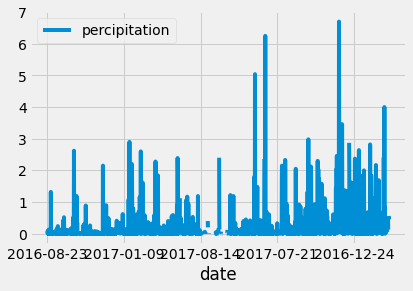

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Find the Date One Year Ago
#Add the most recent date, August 23, 2017
#Starting from the last data point in the database. 

prev_year = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
prev_year= dt.date(2017,8,23) - dt.timedelta(days= 365)

# Perform a query to retrieve the data and precipitation scores
results= []
results = session.query(Measurement.date, Measurement.prcp)
#Prints everything that is returned in the previous query
#print(results.all())

#using the filter(() to filter the data 
results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=["date","percipitation"])
print(df.head())

#setting the index Date to the dataFrame 
df.set_index(df["date"],inplace=True)
print(df.head())

#To print the dataFrame without the index 
print(df.to_string(index=False))


# Sort the dataframe by date
print(df.sort_index())

#Prints the dataFrame with the chronological order of the index=date and also displays the index number 
#print(df.head())

#To print the dataframe with chronological order of hte index column and not display the index column 
print(df.to_string(index= False))



# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [12]:
# What are the most active stations?
session.query(Measurement.station).all()

# List the stations and the counts in descending order.
print(session.query(Measurement.station,func.count(Measurement.station)).all())

#by using group_by()and grouping on Measurement.station to get the count of the station . 

print(session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).all())

# using order_by to List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519397', 19550)]
[('USC00511918', 1979), ('USC00513117', 2709), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00517948', 1372), ('USC00518838', 511), ('USC00519281', 2772), ('USC00519397', 2724), ('USC00519523', 2669)]


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#session.query(Measurement.tobs).all()

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


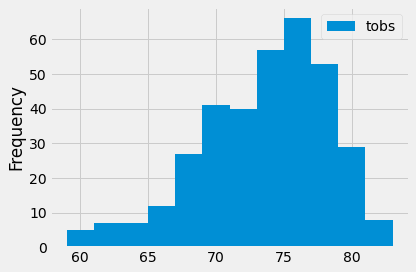

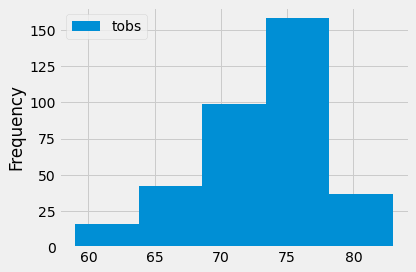

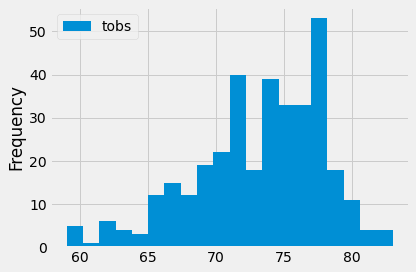

In [14]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)

results = session.query(Measurement.tobs).filter(Measurement.station=="USC00519281").\
filter(Measurement.date>=prev_year).all()
#print(results)

df = pd.DataFrame(results, columns =["tobs"])
print(df)



#When creating a histogram, 
#you'll need to figure how many bins you need. It's recommended that you stay within a range of 5 to 20 bins.
#You may need to play around with the data a bit to find a good fit somewhere between 5 and 20. 


#To create the histogram, we need to use the plot() function and the hist()function and 
#add the number of bins as a parameter. Add the following to your code:
df.plot.hist(bins=12)
plt.tight_layout()


#Skill-Drill -Adjust the number of bins in the plot to 5, 

df.plot.hist(bins=5)
plt.tight_layout()

#and then adjust the number to 20. 

df.plot.hist(bins=20)
plt.tight_layout()
#Take note of any differences in the plot caused by changing the number of bins.



In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
print(calc_temps("2016-08-23", "2017-08-23"))


[(58.0, 87.0, 74.59058295964125)]


# Challenge

In [19]:
!pip install Flask 
    

     |████████████████████████████████| 95 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 289 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 4.0 MB/s eta 0:00:01
